In [62]:
import pandas as pd
import numpy as np

dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
df=dt.copy()

df['High_Low'] = np.where(df['MeanRun']>250, 0, 1)
df[['High_Low']].head(10)
df.High_Low.unique()
df.drop('MeanRun',axis=1,inplace=True)

X=df.drop(columns=['High_Low'])
y=df['High_Low']

from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)

X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

# EXPERIMENT 1: Plotting training and validation cost against learning rates:

#Plotting training cost against 

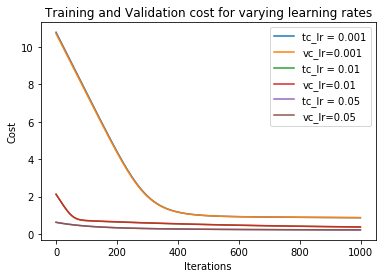

In [63]:
from LogisticRegression_5 import *
Learning_rates= [.001,.01,.05]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,1000,.0000001)
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Training and Validation cost for varying learning rates')
    plt.legend()
    plt.show

In [64]:
cost_t_min

[1.1374684841905678,
 0.42454108317394207,
 0.2662789674765323,
 0.2375220182452401,
 0.21551552922242803]

In [65]:
cost_v_min

[1.1460533658810963,
 0.42840465770142755,
 0.26603842740558176,
 0.23661302375963367,
 0.2146360333799961]

In [16]:
cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,1000,.0000001)
print("Best paramaters based on Gradient Descent:")
w
print("coefficient of MWG_Ordinal   : ", w[0,0])
print("coefficient of NWG_Ordinal   : ", w[0,1])
print("coefficient of KWG_Ordinal   : ", w[0,2])
print("coefficient of MDIMC_ordinal : ", w[0,3])
print("coefficient of NDIMC_ordinal : ", w[0,4])
print("coefficient of MDIMA_ordinal : ", w[0,5])
print("coefficient of NDIMB_ordinal : ", w[0,6])
print("coefficient of KWI_ordinal   : ", w[0,7])
print("coefficient of VWM_ordinal   : ", w[0,8])
print("coefficient of VWN_ordinal   : ", w[0,9])
print("coefficient of STRM_1        : ", w[0,10])
print("coefficient of STRN_1        : ", w[0,11])
print("coefficient of SA_1          : ", w[0,12])
print("coefficient of SB_1          : ", w[0,13])

Best paramaters based on Gradient Descent:
coefficient of MWG_Ordinal   :  1.9039136944578416
coefficient of NWG_Ordinal   :  1.6264289361211428
coefficient of KWG_Ordinal   :  -0.13024134660346415
coefficient of MDIMC_ordinal :  -1.3151397777644083
coefficient of NDIMC_ordinal :  -1.3423397981952492
coefficient of MDIMA_ordinal :  0.08515250227398365
coefficient of NDIMB_ordinal :  0.043334181436467466
coefficient of KWI_ordinal   :  -0.15664653025864875
coefficient of VWM_ordinal   :  0.2421881819039579
coefficient of VWN_ordinal   :  0.1329286409286824
coefficient of STRM_1        :  0.1974735392652169
coefficient of STRN_1        :  0.3652845246748832
coefficient of SA_1          :  0.3777259750069797
coefficient of SB_1          :  0.6741130798848426


<function matplotlib.pyplot.show(*args, **kw)>

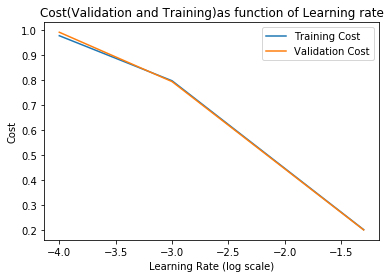

In [11]:
from LogisticRegression_5 import *
Learning_rates= [.0001,.001,.05,]
learning =[]
cost_t_min =[]
cost_v_min =[]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    learning.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(learning),cost_t_min,label='Training Cost')
plt.plot(np.log10(learning),cost_v_min,label='Validation Cost')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Cost')  
plt.title('Cost(Validation and Training)as function of Learning rate')
plt.legend()
plt.show

# Experiment 2:
Plotting Cost of Training and Validation against varying Threshold

<function matplotlib.pyplot.show(*args, **kw)>

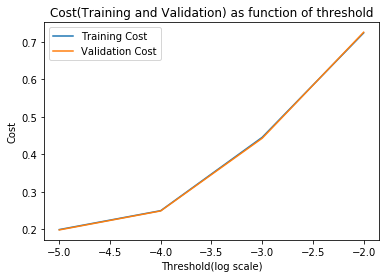

In [73]:
from LogisticRegression_5 import *
threshold= [.01,.001,.0001,.00001]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,2000000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

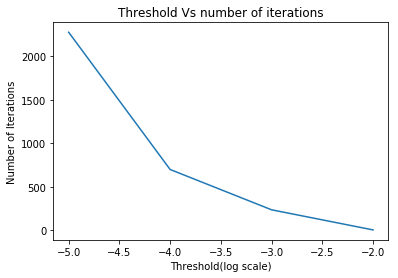

In [74]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show

In [75]:
iterate

[6, 237, 700, 2276]

In [76]:
cost_t_min

[0.7237473666192512,
 0.4452487430359893,
 0.2495638076705708,
 0.19911811588465622]

In [77]:
cost_v_min

[0.7255653553190384,
 0.4428094146214091,
 0.24889134970797216,
 0.19819364465305495]

10e-12 seems to be the best threshold therefore we decide to plot the training and test error for this threshold

# Selecting 8  Random Features:

In [78]:
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\logistic_output.csv")
df = dt.drop(columns=['High_Low','MeanRun'])
y  = dt['High_Low']
X = df[df.columns.to_series().sample(8)]
X.columns

Index(['SB_1', 'NWG_Ordinal', 'KWI_ordinal', 'VWM_ordinal', 'STRM_1',
       'MWG_Ordinal', 'NDIMB_ordinal', 'VWN_ordinal'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)
X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

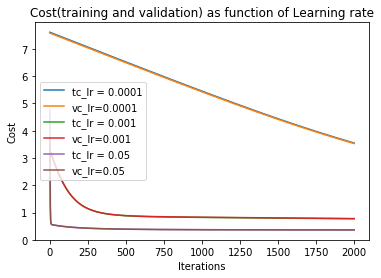

In [86]:
from LogisticRegression_5 import *
Learning_rates= [.0001,.001,.05]


for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Cost(training and validation) as function of Learning rate')
    plt.legend()
    plt.show

In [87]:
cost_t_min

[0.5092089425470439,
 0.5075233426259296,
 0.39465266790264575,
 0.3705490518088652]

In [88]:
cost_v_min

[0.5068425578163276,
 0.5077676152198203,
 0.3941208343974911,
 0.37015698183089607]

<function matplotlib.pyplot.show(*args, **kw)>

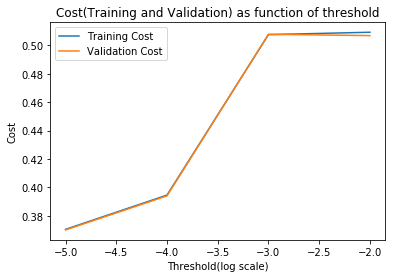

In [81]:
from LogisticRegression_5 import *
threshold= [.01,.001,.0001,.00001]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,2000000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

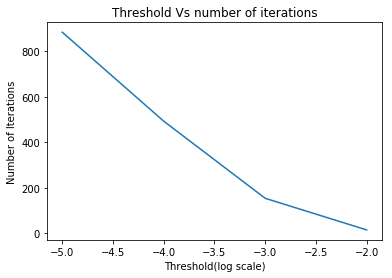

In [82]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show

In [83]:
iterate

[15, 154, 493, 884]

In [84]:
cost_t_min

[0.5092089425470439,
 0.5075233426259296,
 0.39465266790264575,
 0.3705490518088652]

In [85]:
cost_v_min

[0.5068425578163276,
 0.5077676152198203,
 0.3941208343974911,
 0.37015698183089607]

In [ ]:
#Plotting training and validation cost for best threshold.

# Experiment - 4

Based on the exploratory data analysis it appears that variables like VWN, VWM,NDIMB,MDIMB, and binary variables, all other variables have some values which always result in low run time. Based on this observation, selected following 8 features:
MWG_Ordinal
NWG_Ordinal
KWG_Ordinal
MDIMC_Ordinal
NDIMC_Ordinal
MDIMA_Ordinal
NDIMA_Ordinal
VWM_Ordinal


In [89]:
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\logistic_output.csv")
df = dt.drop(columns=['High_Low','MeanRun'])
y  = dt['High_Low']
df.drop(columns=['VWN_ordinal', 'STRM_1', 'STRN_1', 'SA_1', 'SB_1'],inplace=True)
X=df
X.columns

Index(['MWG_Ordinal', 'NWG_Ordinal', 'KWG_Ordinal', 'MDIMC_ordinal',
       'NDIMC_ordinal', 'MDIMA_ordinal', 'NDIMB_ordinal', 'KWI_ordinal',
       'VWM_ordinal'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)
X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

Plotting Training and Validation cost againg number of iterationsfor different learning rates

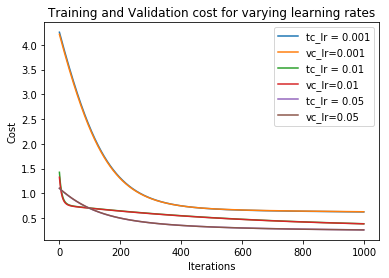

In [91]:
from LogisticRegression_5 import *
Learning_rates= [.001,.01,.05]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,1000,.0000001)
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Training and Validation cost for varying learning rates')
    plt.legend()
    plt.show

In [94]:
cost_t[-1]

0.2625542713662196

In [96]:
cost_v[-1]

0.2615160620243978

Plotting Training and validation costs against varying learning rates

<function matplotlib.pyplot.show(*args, **kw)>

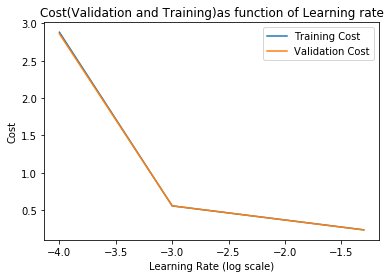

In [38]:
from LogisticRegression_5 import *
Learning_rates= [.0001,.001,.05,]
learning =[]
cost_t_min =[]
cost_v_min =[]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    learning.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(learning),cost_t_min,label='Training Cost')
plt.plot(np.log10(learning),cost_v_min,label='Validation Cost')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Cost')  
plt.title('Cost(Validation and Training)as function of Learning rate')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

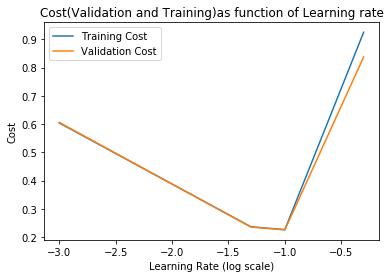

In [41]:
from LogisticRegression_5 import *
Learning_rates= [.001,.05,.1,.5]
learning =[]
cost_t_min =[]
cost_v_min =[]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    learning.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(learning),cost_t_min,label='Training Cost')
plt.plot(np.log10(learning),cost_v_min,label='Validation Cost')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Cost')  
plt.title('Cost(Validation and Training)as function of Learning rate')
plt.legend()
plt.show

#Plotting Training and Validation cost against iteration for different theshold

<function matplotlib.pyplot.show(*args, **kw)>

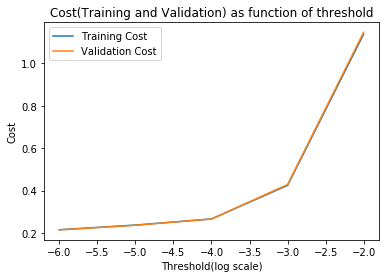

In [59]:
from LogisticRegression_5 import *
#threshold= [.00000001,.000000001,.000000000001,.0000000000001,.00000000000001]
threshold= [.01,.001,.0001,.00001,.000001]
thresh = []
cost_t_min =[]
cost_v_min =[]
for i in threshold:
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,20000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

In [60]:
print(cost_t_min[-1])
print(cost_t_min[-2])
print(cost_t_min[-3])
print(cost_t_min[-4])
print(iteration)

0.21551552922242803
0.2375220182452401
0.2662789674765323
0.42454108317394207
10155


#Plotting training and validation cost against iterations for best threshold

<function matplotlib.pyplot.show(*args, **kw)>

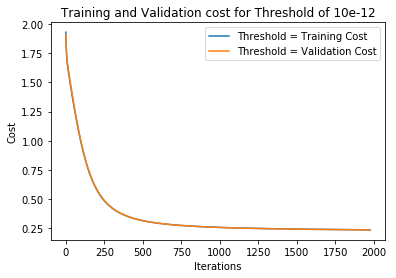

In [61]:

cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,10000,.00001)
plt.plot(cost_t,label='Threshold = Training Cost ')
plt.plot(cost_v,label='Threshold = Validation Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')  
plt.title('Training and Validation cost for Threshold of 10e-12')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

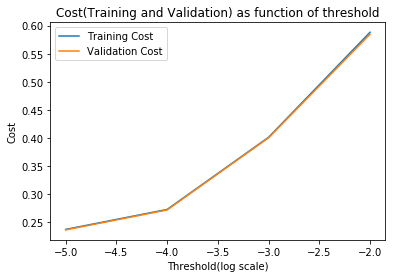

In [97]:
from LogisticRegression_5 import *
threshold= [.01,.001,.0001,.00001]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = logistic_regression_model(X_train,y_train,X_val,y_val,.05,2000000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

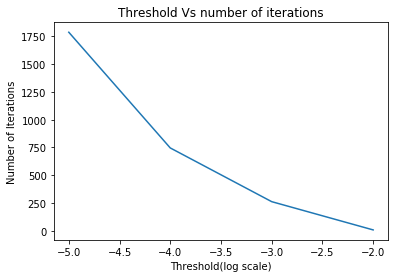

In [98]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show